In [4]:
import cv2
import time
import numpy as np
import matplotlib . pyplot as plt
from ex2_utils import generate_responses_1, get_patch, create_epanechnik_kernel, extract_histogram, backproject_histogram

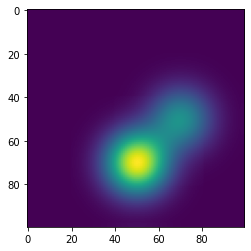

In [10]:
fig = plt.figure()
res = generate_responses_1()
plt.imshow(res)
plt.show()

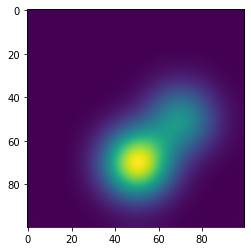

0.0016134696


In [25]:
ep = create_epanechnik_kernel(21,21, 1)

plt.imshow(cv2.filter2D(res, -1, ep))
plt.show()
print(np.max(res))

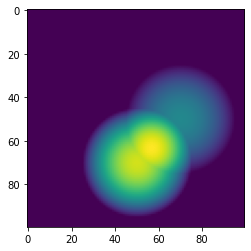

(100, 100)
1.0728


In [26]:
ep = create_epanechnik_kernel(51,51, 1)
responses = np.zeros((100, 100), dtype=np.float32)
responses[70, 50] = 1
responses[50, 70] = 0.5
filtered = cv2.filter2D(responses, -1, ep)

plt.imshow(filtered)
plt.show()
print(filtered.shape)
print(np.max(filtered))

6


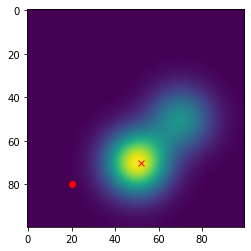

In [78]:
pdf = generate_responses_1()
start = [20, 80]
real_start = [20, 80]

size = [31, 31]
[X, Y] = np.meshgrid(np.arange(-int(size[0]/2), int(size[0]/2) + 1), np.arange(-int(size[1]/2), int(size[1]/2) + 1))
filtered = generate_responses_1()
for i in range(200):
    # plt.imshow(filtered)
    # plt.plot(start[0],start[1], 'rx')
    # plt.show() 
    w,_ = get_patch(filtered, start, size)
    w = w/np.sum(w)
    x_shift = np.sum(np.multiply(w, X))
    y_shift = np.sum(np.multiply(w, Y))
    start[0] += x_shift
    start[1] += + y_shift

    if np.sqrt(x_shift**2 + y_shift**2) < 0.5:
        print(i)
        break

plt.imshow(filtered)
plt.plot(start[0],start[1], 'rx')
plt.plot(real_start[0],real_start[1], 'ro')
plt.show() 

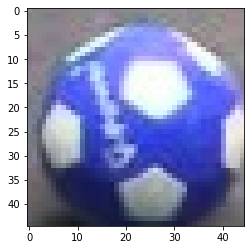

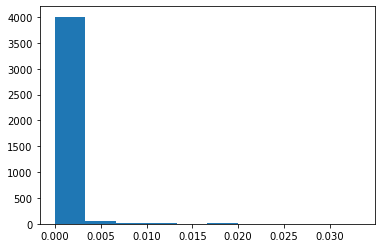

In [111]:
im = cv2.imread("./Sequences/ball/00000000.jpg")
start = [222,134]
size = [45, 45]
X, Y = np.meshgrid(np.arange(-int(size[0]/2), int(size[0]/2) + 1), np.arange(-int(size[1]/2), int(size[1]/2) + 1))
wi,_ = get_patch(im, start, size)
plt.imshow(wi)
plt.show()
ep = create_epanechnik_kernel(45,45,1)

h1 = extract_histogram(wi, 16, ep)
h1 = h1/np.sum(h1)
plt.hist(h1)
plt.show()

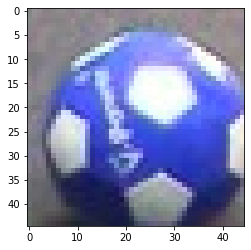

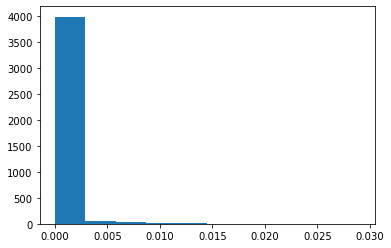

In [107]:
im2 = cv2.imread("./Sequences/ball/00000005.jpg")

wi,_ = get_patch(im2, start, size)
plt.imshow(wi)
plt.show()
ep = create_epanechnik_kernel(45,45,1)

h2 = extract_histogram(wi, 16, ep)
h2 = h2/np.sum(h2)
plt.hist(h2)
plt.show()

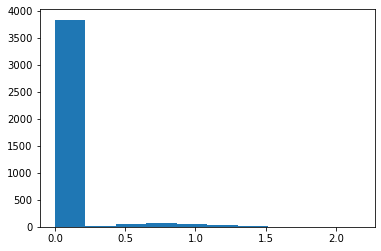

In [108]:
h3 = np.sqrt(h1/(h2+1e-3))
plt.hist(h3)
plt.show()

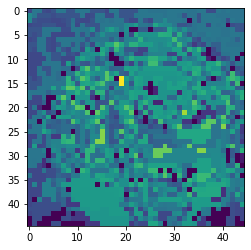

In [109]:
back = backproject_histogram(wi, h3, 16)
plt.imshow(back)
plt.show()

In [110]:
back = back/np.sum(back)
new_x = np.sum(X*back)
new_y = np.sum(Y*back)
print(new_x)
new_y

0.7570265567622445


0.04540489802610015